In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "sicilia"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,19,Sicilia,1,0,1,2,3,3,3,...,0.0,0.0,0.0,2.0,0.00,33.33,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,19,Sicilia,1,0,1,2,3,0,0,...,0.0,0.0,0.0,0.0,0.00,33.33,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,19,Sicilia,1,0,1,1,2,-1,1,...,0.0,0.0,0.0,-1.0,0.00,50.00,0.00,0.00,0.00,-33.33
3,2020-02-28T18:00:00,19,Sicilia,1,0,1,1,2,0,0,...,0.0,0.0,0.0,0.0,0.00,50.00,0.00,0.00,0.00,0.00
4,2020-02-29T17:00:00,19,Sicilia,1,0,1,1,2,0,0,...,0.0,1.0,0.0,0.0,0.00,50.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,2020-12-12T17:00:00,19,Sicilia,1243,196,1439,34322,35761,-649,1016,...,23.0,9059.0,5940.0,-611.0,13.62,4.02,11.22,17.10,-0.51,-1.78
292,2020-12-13T17:00:00,19,Sicilia,1226,198,1424,34295,35719,-42,808,...,21.0,7094.0,4385.0,-27.0,13.90,3.99,11.39,18.43,1.02,-0.12
293,2020-12-14T17:00:00,19,Sicilia,1237,189,1426,34415,35841,122,914,...,32.0,7091.0,4634.0,120.0,13.25,3.98,12.89,19.72,-4.55,0.34
294,2020-12-15T17:00:00,19,Sicilia,1225,185,1410,34559,35969,128,1087,...,31.0,9086.0,5538.0,144.0,13.12,3.92,11.96,19.63,-2.12,0.36


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 16, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 1065
Nuovi tamponi: 9974.0
Percentuale nuovi positivi/nuovi tamponi: 10.7 %
Nuovi guariti: 1829.0
Nuovi deceduti: 29.0
Variazione positivi ricoverati con sintomi: -37.0
Variazione positivi in terapia intensiva: -2.0
Variazione positivi in isolamento dimiciliare: -754.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 16, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-10-17T17:00:00,19,Sicilia,479,61,540,5741,6281,347,475,...,2.0,5739.0,5088.0,336.0,11.30,8.60,8.28,9.34,5.17,5.85
1,2020-10-18T17:00:00,19,Sicilia,493,70,563,6227,6790,509,548,...,3.0,6390.0,4435.0,486.0,12.43,8.29,8.58,12.36,14.75,8.10
2,2020-10-19T17:00:00,19,Sicilia,521,72,593,6426,7019,229,362,...,3.0,3252.0,2005.0,199.0,12.14,8.45,11.13,18.05,2.86,3.37
3,2020-10-20T17:00:00,19,Sicilia,542,77,619,6878,7497,478,574,...,10.0,8131.0,5532.0,452.0,12.44,8.26,7.06,10.38,6.94,6.81
4,2020-10-21T17:00:00,19,Sicilia,565,83,648,7202,7850,353,562,...,11.0,7412.0,3500.0,324.0,12.81,8.25,7.58,16.06,7.79,4.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-12-12T17:00:00,19,Sicilia,1243,196,1439,34322,35761,-649,1016,...,23.0,9059.0,5940.0,-611.0,13.62,4.02,11.22,17.10,-0.51,-1.78
57,2020-12-13T17:00:00,19,Sicilia,1226,198,1424,34295,35719,-42,808,...,21.0,7094.0,4385.0,-27.0,13.90,3.99,11.39,18.43,1.02,-0.12
58,2020-12-14T17:00:00,19,Sicilia,1237,189,1426,34415,35841,122,914,...,32.0,7091.0,4634.0,120.0,13.25,3.98,12.89,19.72,-4.55,0.34
59,2020-12-15T17:00:00,19,Sicilia,1225,185,1410,34559,35969,128,1087,...,31.0,9086.0,5538.0,144.0,13.12,3.92,11.96,19.63,-2.12,0.36


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

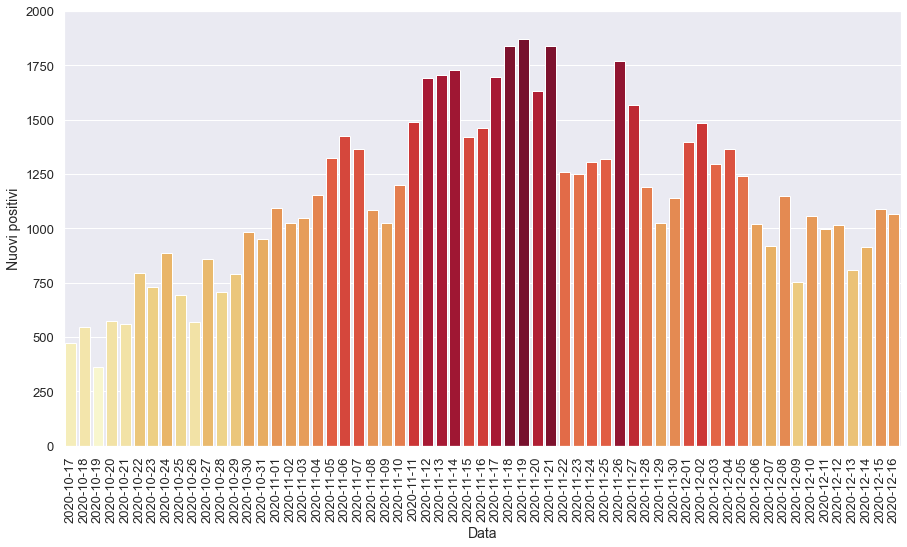

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

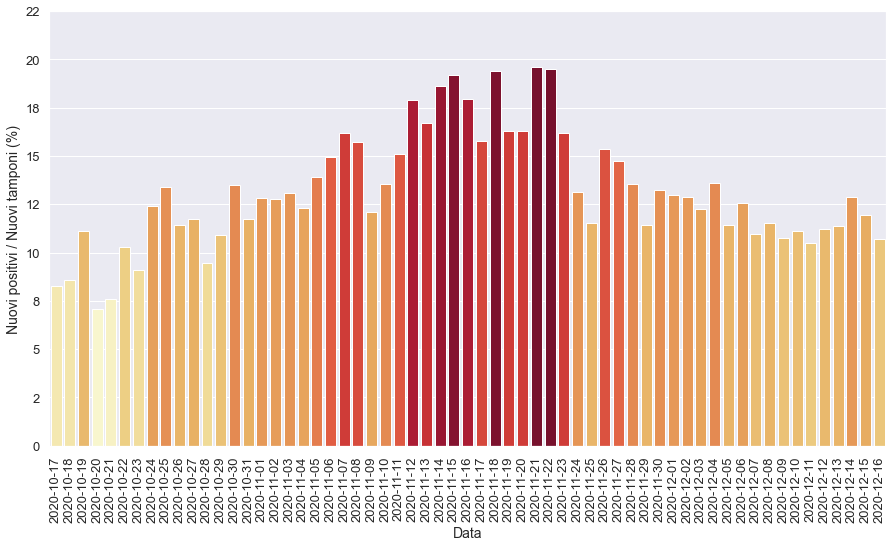

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

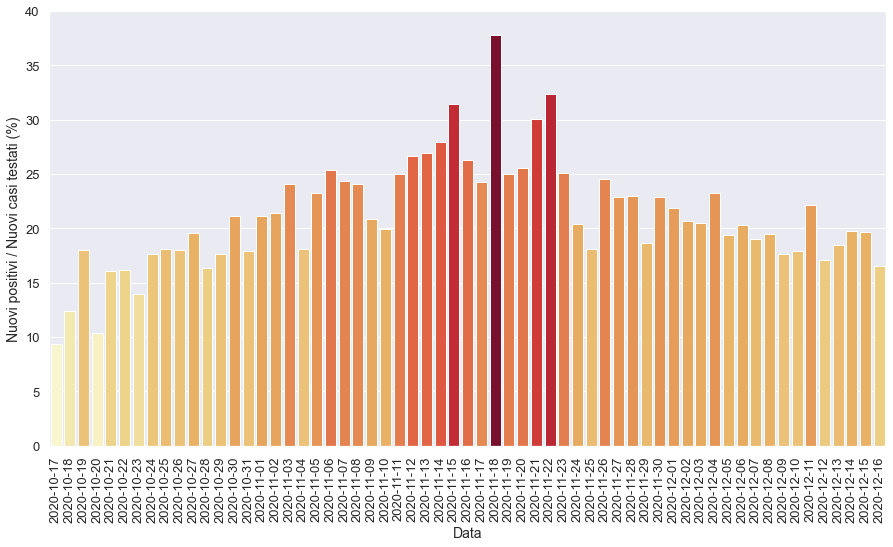

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

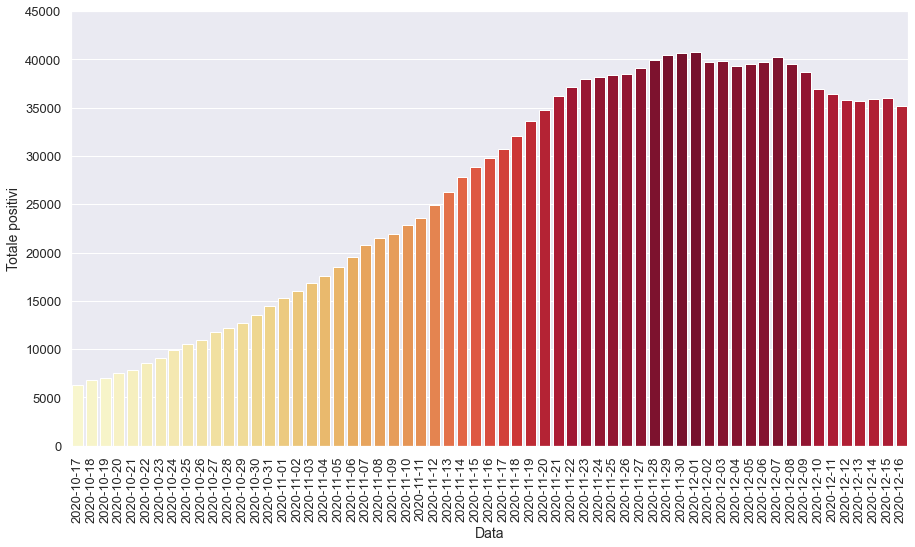

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

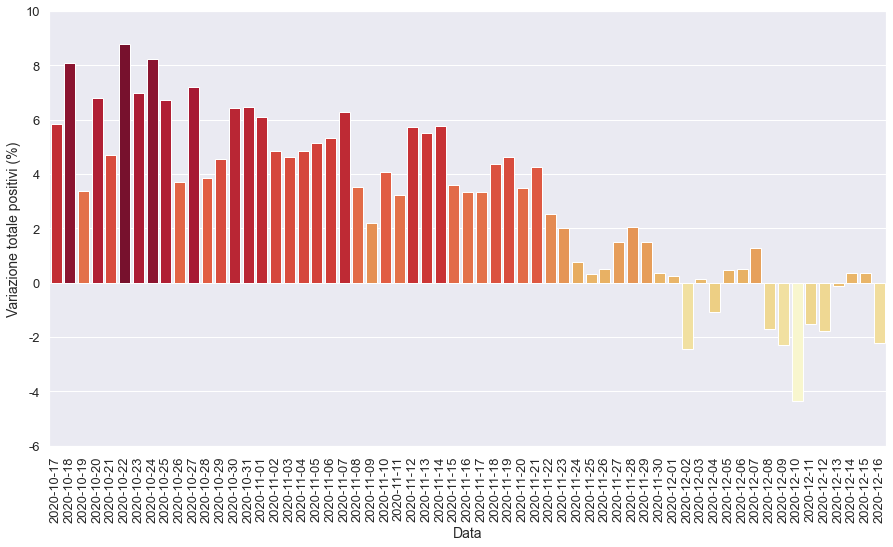

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

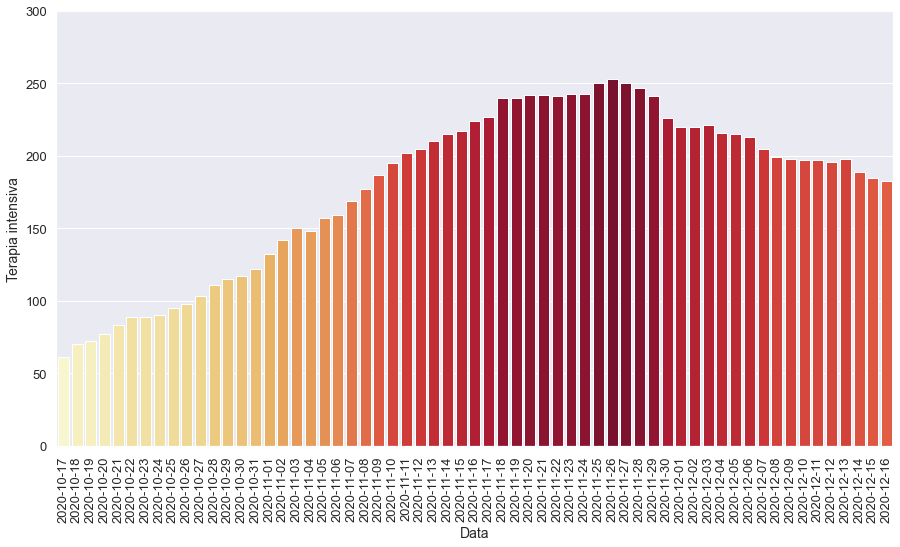

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

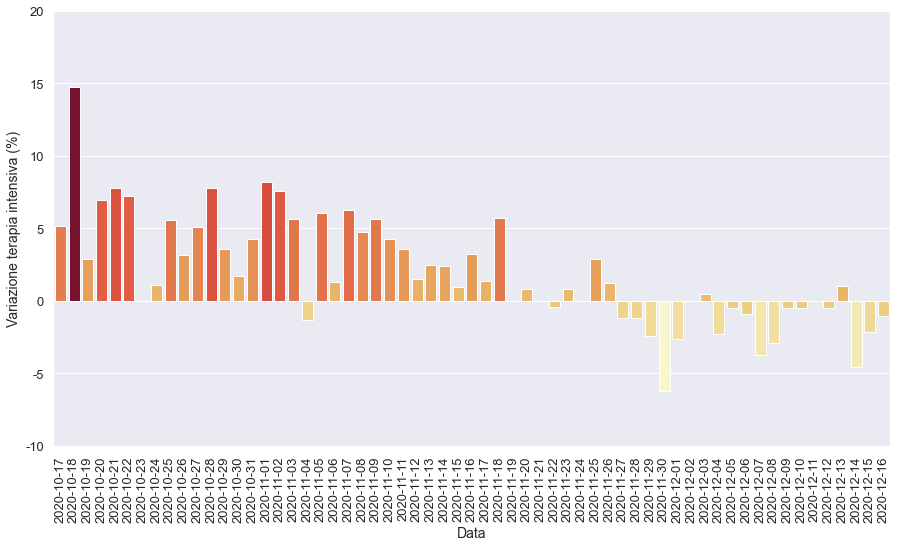

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

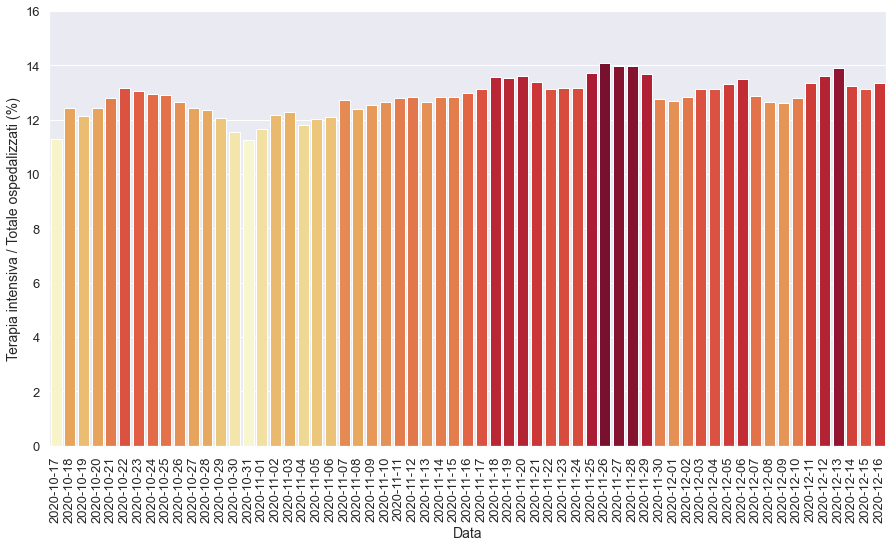

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

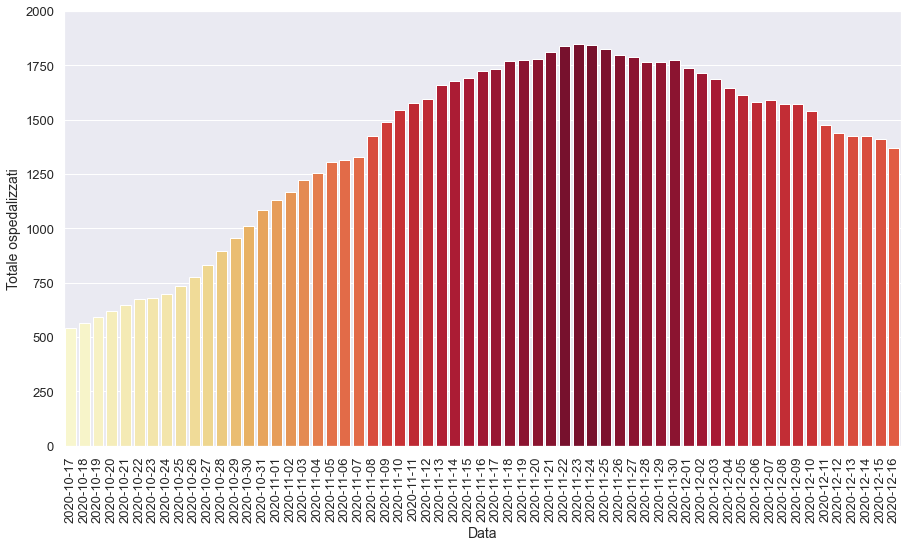

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

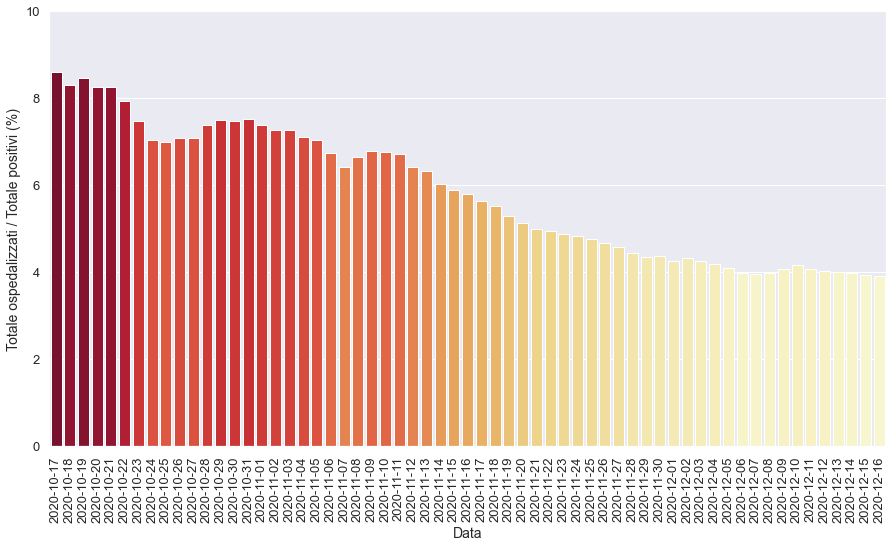

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

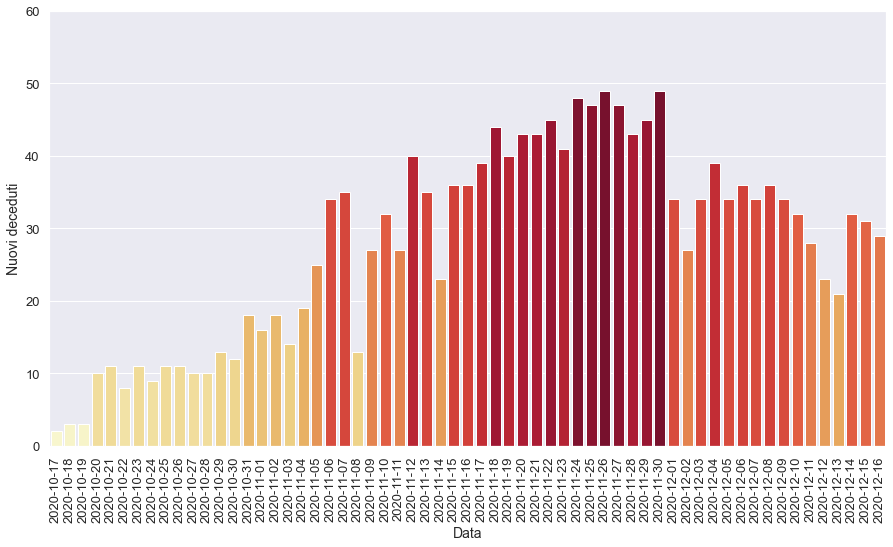

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

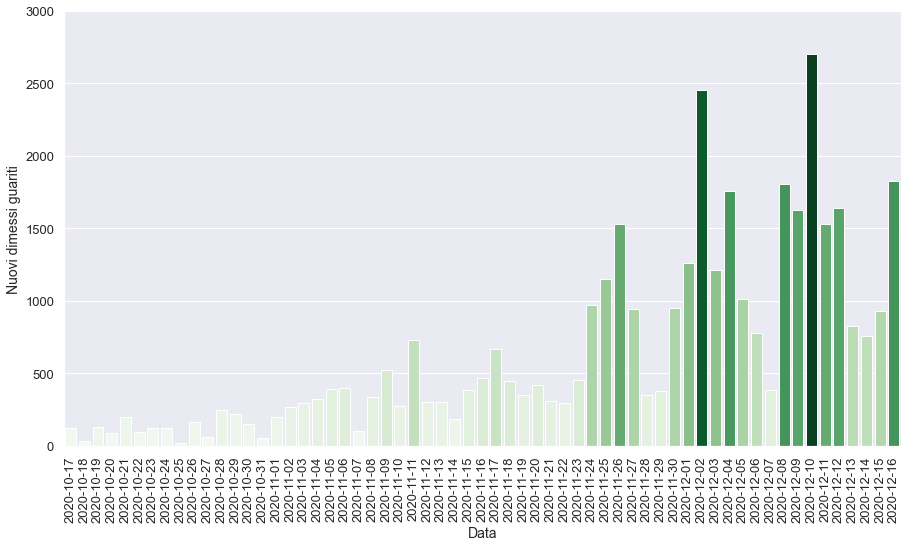

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-16T17:00:00,19,Sicilia,1501,224,1725,28040,29765,958,1461,...,36.0,8151.0,5564.0,926.0,12.99,5.80,17.92,26.26,3.23,3.33
1,2020-11-17T17:00:00,19,Sicilia,1505,227,1732,29024,30756,991,1698,...,39.0,10774.0,7001.0,984.0,13.11,5.63,15.76,24.25,1.34,3.33
2,2020-11-18T17:00:00,19,Sicilia,1528,240,1768,30334,32102,1346,1837,...,44.0,9479.0,4867.0,1310.0,13.57,5.51,19.38,37.74,5.73,4.38
3,2020-11-19T17:00:00,19,Sicilia,1532,240,1772,31809,33581,1479,1871,...,40.0,11470.0,7475.0,1475.0,13.54,5.28,16.31,25.03,0.00,4.61
4,2020-11-20T17:00:00,19,Sicilia,1537,242,1779,32977,34756,1175,1634,...,43.0,10020.0,6405.0,1168.0,13.60,5.12,16.31,25.51,0.83,3.50
5,2020-11-21T17:00:00,19,Sicilia,1568,242,1810,34431,36241,1485,1838,...,43.0,9386.0,6114.0,1454.0,13.37,4.99,19.58,30.06,0.00,4.27
6,2020-11-22T17:00:00,19,Sicilia,1597,241,1838,35324,37162,921,1258,...,45.0,6447.0,3887.0,893.0,13.11,4.95,19.51,32.36,-0.41,2.54
7,2020-11-23T17:00:00,19,Sicilia,1604,243,1847,36066,37913,751,1249,...,41.0,7712.0,4984.0,742.0,13.16,4.87,16.20,25.06,0.83,2.02
8,2020-11-24T17:00:00,19,Sicilia,1601,243,1844,36355,38199,286,1306,...,48.0,9963.0,6388.0,289.0,13.18,4.83,13.11,20.44,0.00,0.75
9,2020-11-25T17:00:00,19,Sicilia,1574,250,1824,36496,38320,121,1317,...,47.0,11433.0,7275.0,141.0,13.71,4.76,11.52,18.10,2.88,0.32


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

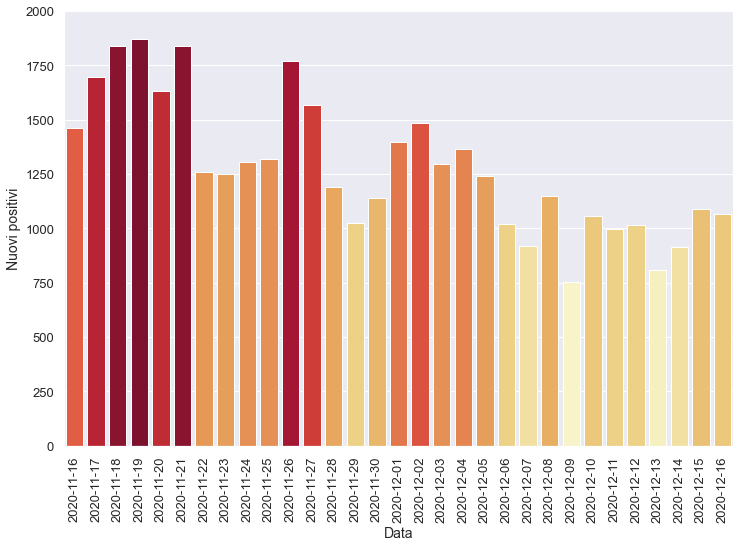

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

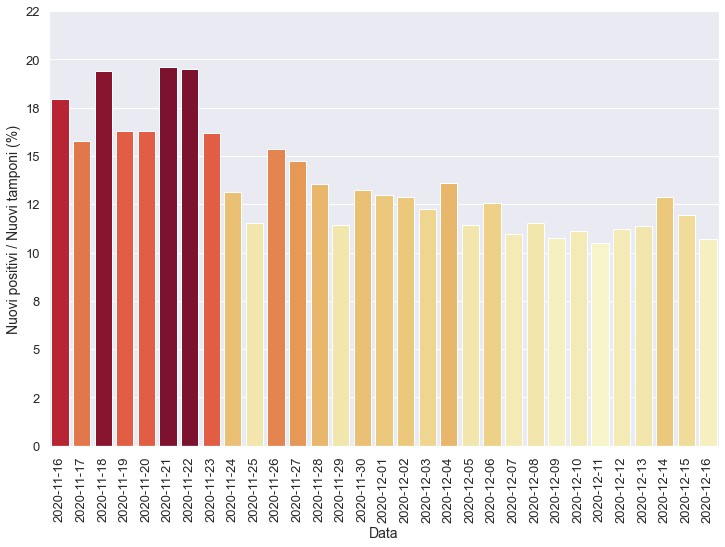

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

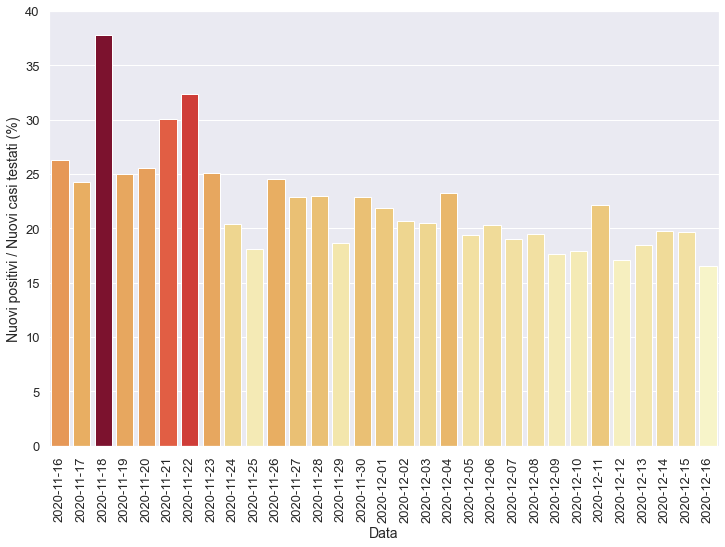

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

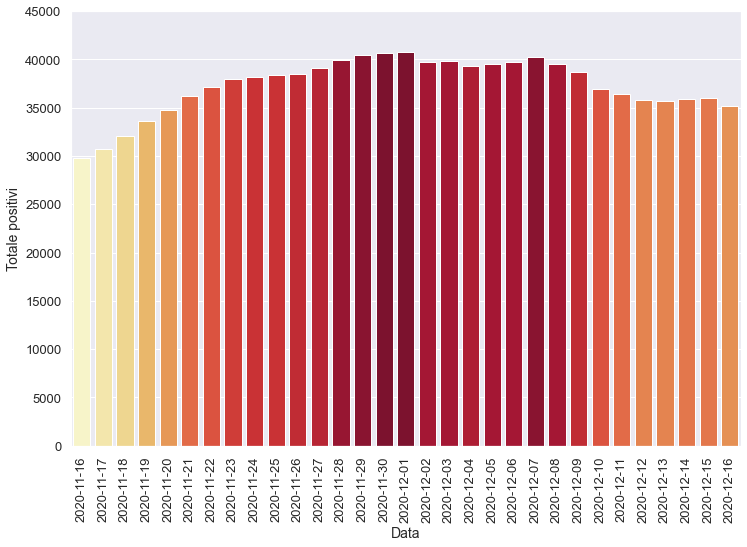

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

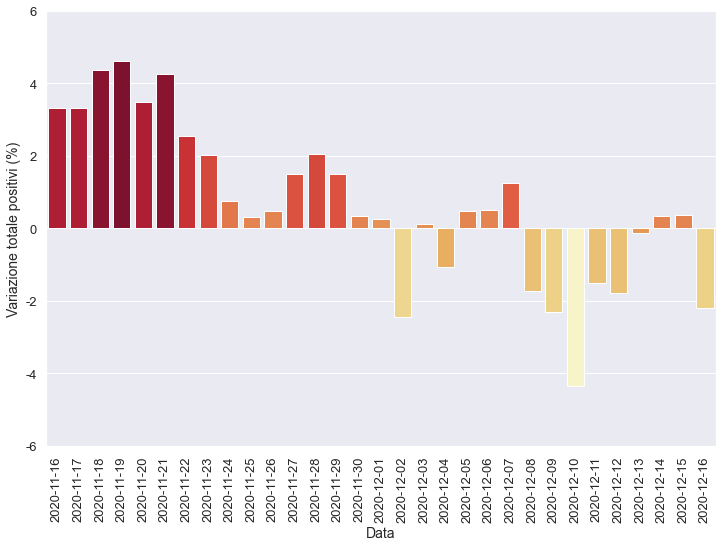

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

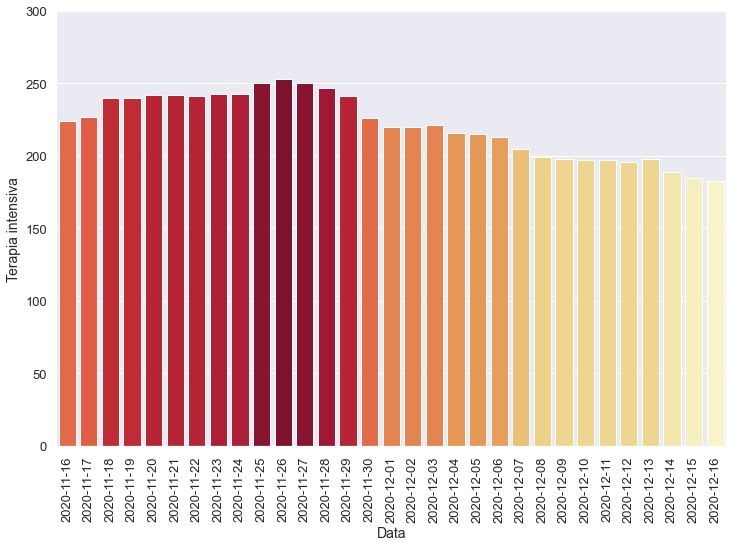

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

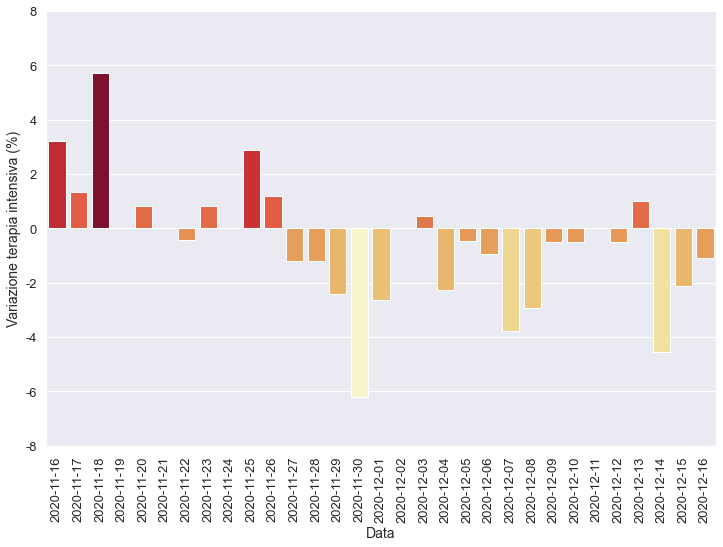

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

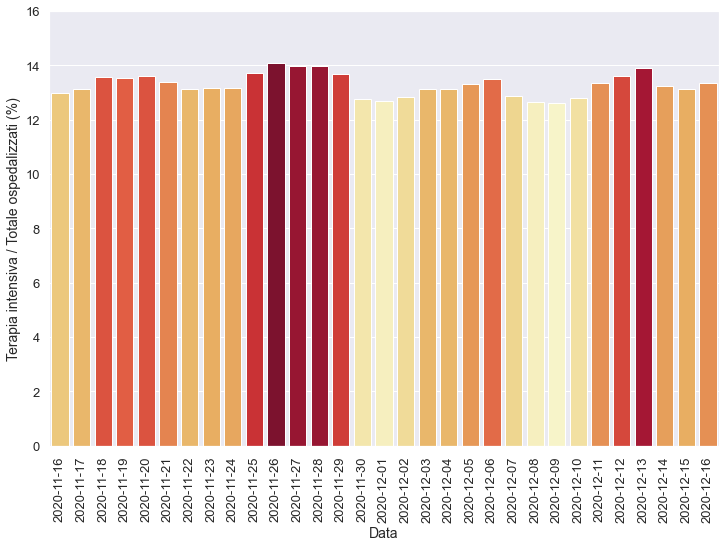

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

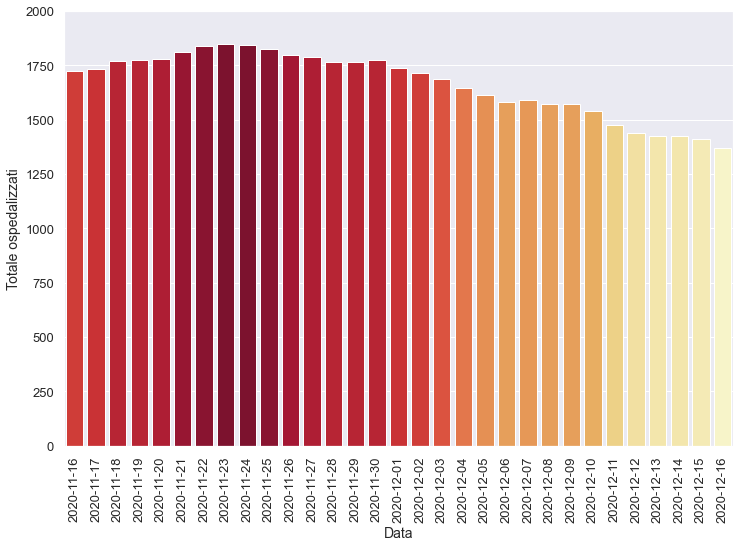

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

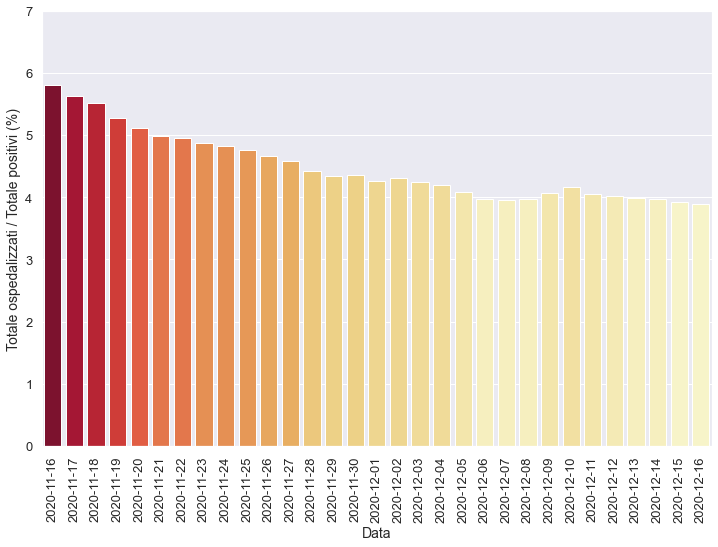

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

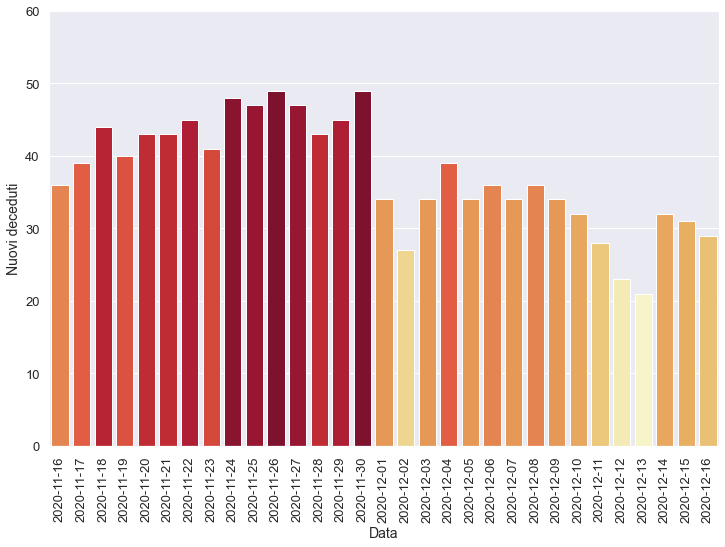

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

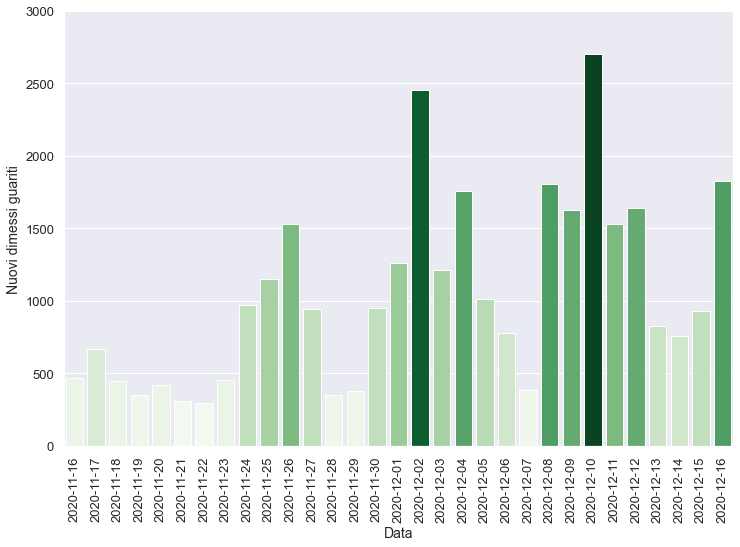

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-09T17:00:00,19,Sicilia,1374,198,1572,37075,38647,-908,753,...,34.0,7013.0,4266.0,-907.0,12.60,4.07,10.74,17.65,-0.50,-2.30
1,2020-12-10T17:00:00,19,Sicilia,1342,197,1539,35430,36969,-1678,1059,...,32.0,9526.0,5923.0,-1645.0,12.80,4.16,11.12,17.88,-0.51,-4.34
2,2020-12-11T17:00:00,19,Sicilia,1280,197,1477,34933,36410,-559,999,...,28.0,9534.0,4503.0,-497.0,13.34,4.06,10.48,22.19,0.00,-1.51
3,2020-12-12T17:00:00,19,Sicilia,1243,196,1439,34322,35761,-649,1016,...,23.0,9059.0,5940.0,-611.0,13.62,4.02,11.22,17.10,-0.51,-1.78
4,2020-12-13T17:00:00,19,Sicilia,1226,198,1424,34295,35719,-42,808,...,21.0,7094.0,4385.0,-27.0,13.90,3.99,11.39,18.43,1.02,-0.12
5,2020-12-14T17:00:00,19,Sicilia,1237,189,1426,34415,35841,122,914,...,32.0,7091.0,4634.0,120.0,13.25,3.98,12.89,19.72,-4.55,0.34
6,2020-12-15T17:00:00,19,Sicilia,1225,185,1410,34559,35969,128,1087,...,31.0,9086.0,5538.0,144.0,13.12,3.92,11.96,19.63,-2.12,0.36
7,2020-12-16T17:00:00,19,Sicilia,1188,183,1371,33805,35176,-793,1065,...,29.0,9974.0,6444.0,-754.0,13.35,3.90,10.68,16.53,-1.08,-2.20


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

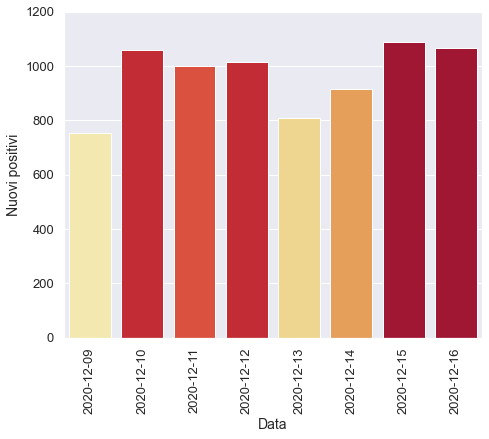

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

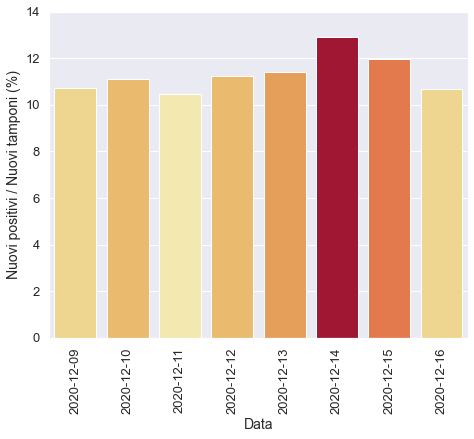

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

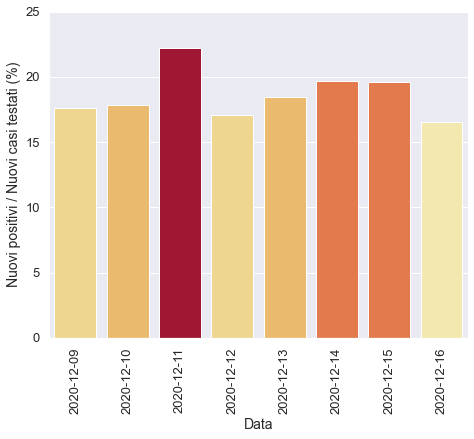

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

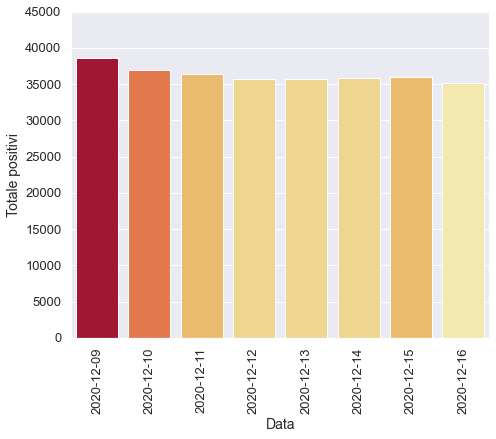

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

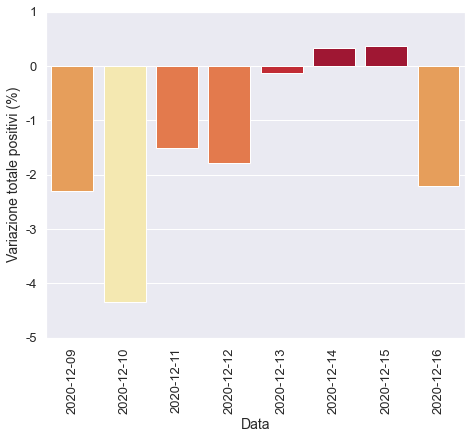

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

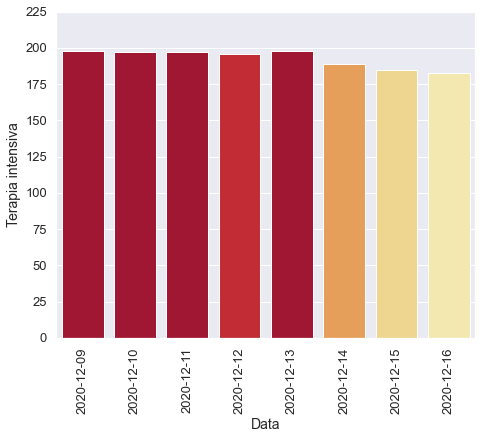

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

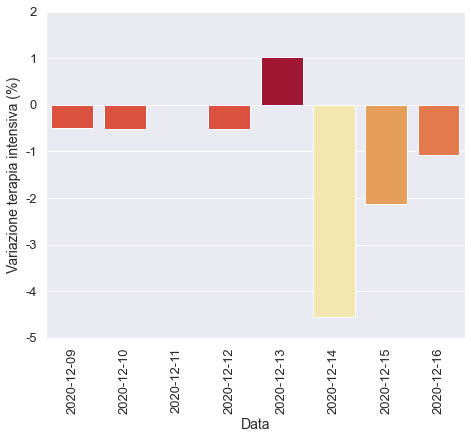

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

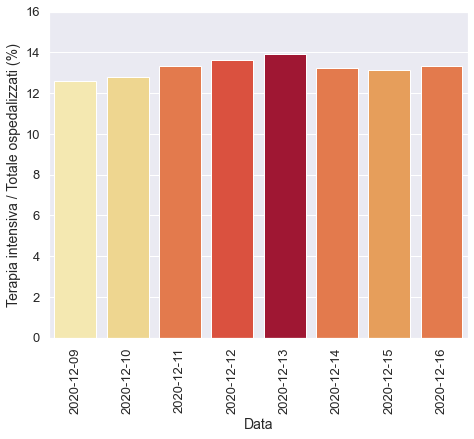

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

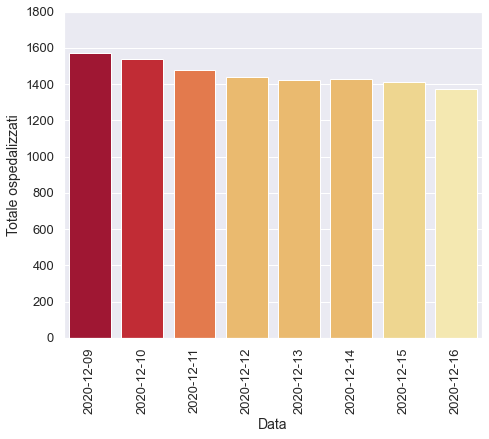

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

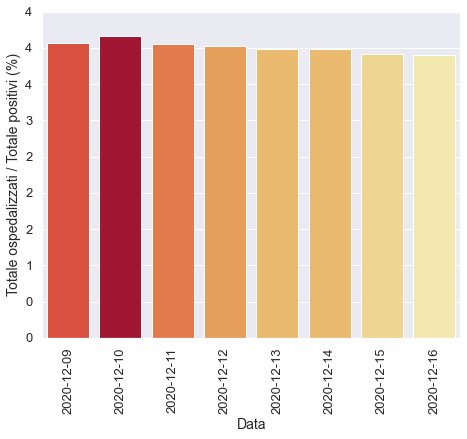

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

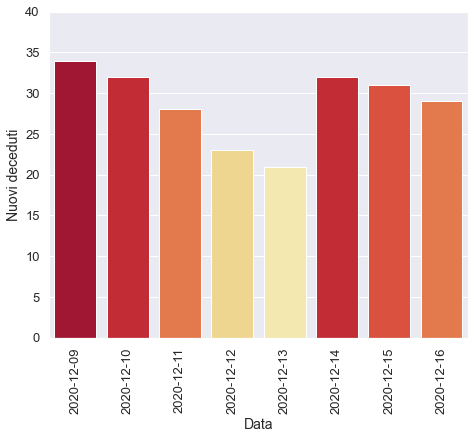

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

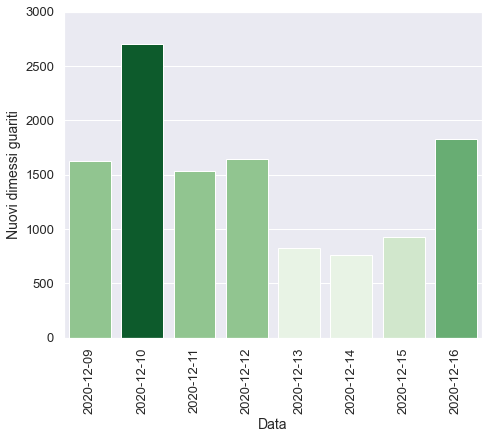

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)